# Background and Tools
There are two algorithms with similar names, which makes them prone to confusion although they have different purposes and follow different learning paradigms. One is in fact a clustering algorithm, k-Means, which in an unsupervised manner finds k clusters in a data set. This is done by iteratively setting out / moving k cluster centers and grouping the points in the set closest into the cluster, while at the same time optimising the separation between the groups (clusters) of data points. The other is a classifier, k-NN, which in its basic conceptual form does not actually do anything to fit a model to the given data, it simply finds the k nearest neighbours in the entire data set to an unseen data point, given some distance measure, and assigns it the class of the majority of the k samples. In actual implementations, other techniques are used to structure the data somewhat, so that the search for the closest points only has to be carried out in a part of the data set. However, it can be called supervised, as it is given the class labels of the data points it works with to do this pre-processing.

You will in this assignment work with a simplified version of the MNIST handwritten numbers dataset provided by SciKitLearn (sklearn.datasets.digits) and inspect and modify it with UMAP, calculate the cosine similarity of each data sample against the means over the different classes, and later both cluster it with k-Means as well as use the k-NN classifier on it, to then run different evaluation tools. The idea is to have used UMAP (as one example of a tool for dimensionality reduction), done a matrix multiplication in Python / Numpy, understand the different elements of the SciKitLearn confusion matrix and evaluation reports, as well as to see what you can do to evaluate a clustering approach (which is not as naturally done as for a classification, where an answer is either wrong or correct). 


# Exercise 1: Getting started


### Exercise 1.1
Make sure to have all the necessary basic tools running with the ["Lab 0: Python intro"](https://canvas.education.lu.se/courses/32297/pages/lab-0-python-intro) exercise. If not already included in your setup, install UMAP (e.g. with ```pip install umap-learn```, see https://umap-learn.readthedocs.io/en/latest/basic_usage.html for some hints).


In [16]:
# Install with pip install scikit-learn pandas seaborn umap-learn IProgress
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from collections import Counter # For majority counting, but is not strictly necessary
import matplotlib.pyplot as plt 
import numpy as np

import seaborn as sns
import pandas as pd
import umap

### Exercise 1.2
Load the digits dataset from the datasets provided in SciKitLearn. [The python tutorial by Dennis Medved](Python_introduction.ipynb) can provide you with code snippets and inspiration to this and later parts of the assignment.

Inspect the data, plot some sample images (use matplotlib) and be prepared to answer questions about the dataset.


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
data matrix shape: (1797, 64)
data: [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]...
Target vector shape: (1797,)
Target names: [0 1 2 3 4 5 6 7 8 9]
Target: [

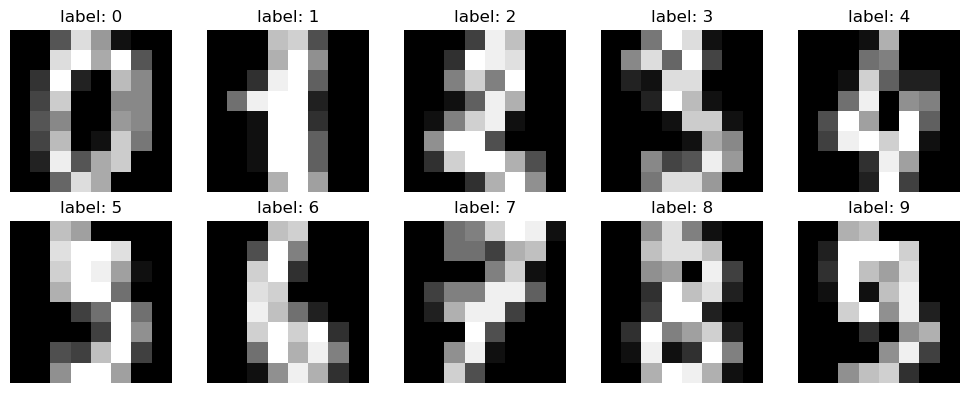

In [17]:
# *****************
# *** Your code ***
# *****************
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits=load_digits()

print(digits.keys()) #observe the keys of the dataset
print(f"data matrix shape: {digits.data.shape}")
print(f"data: {digits.data[:3]}...")

print(f"Target vector shape: {digits.target.shape}")
print(f"Target names: {digits.target_names}")
print(f"Target: {digits.target[:15]}...")

if digits.frame is None:
    print("frame: None")
else:
    print(f"frame shape: {digits.frame.shape}")

print(f"feature names: {digits.feature_names[:5]}...") #print the first 5 feature names

print(f"Image tensor shape: {digits.images.shape}")
# Visualize some of the digits
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, img, label in zip(axes.ravel(), digits.images[:10], digits.target[:10]):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"label: {label}")
    ax.axis('off')
plt.tight_layout()

print(f"Description: {digits.DESCR}...") #print the first 193 characters of the description


### Exercise 1.3
Create and train (fit) a UMAP-reducer, then transform and visualise your data, e.g. doing something like:


C:\Users\12627\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


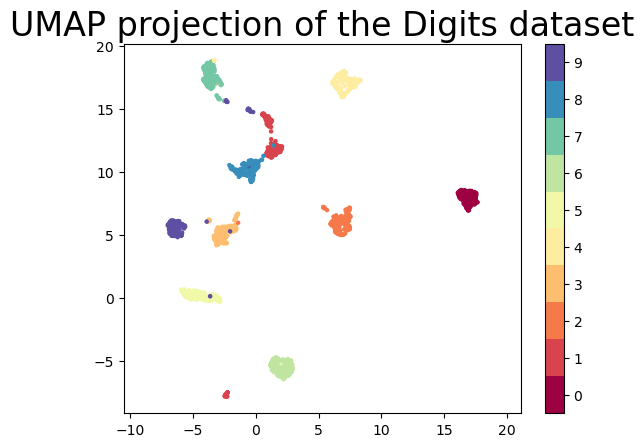

In [18]:
########### Example code ###########
reducer = umap.UMAP(random_state=42) # Initialize UMAP reducer
reducer.fit(digits.data) # Fit UMAP on the digits data(64)
embedding = reducer.transform(digits.data) # Transform the data to 2D embedding

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);



__Be prepared to explain, at least on a conceptual level, what it does__


# Exercise 2
Calculate the cosine-similarity (should be explained in lecture 2) of each sample against the means of the classes in the data set as following:

### Exercise 2.1
Calculate the "mean image" per class, ```mean_images``` 


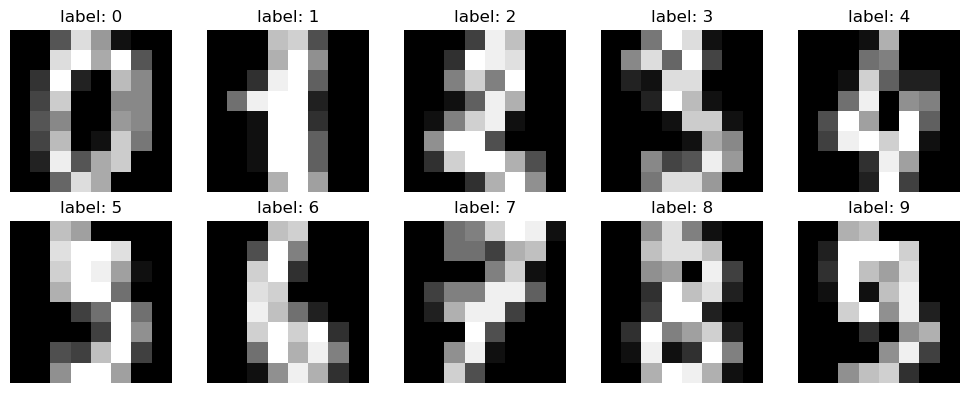

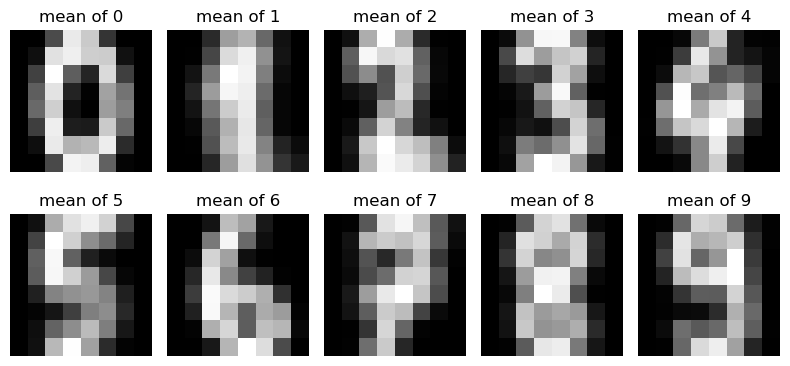

In [19]:
# *****************
# *** Your code ***
# *****************
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
#original
# Visualize some of the digits
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, img, label in zip(axes.ravel(), digits.images[:10], digits.target[:10]):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"label: {label}")
    ax.axis('off')
plt.tight_layout()

#mean images
digits = load_digits()

mean_images = []  #calculate the mean image for each digit class(on target axis)
for digit in range(10):
    class_imgs = digits.images[digits.target == digit]
    mean_images.append(class_imgs.mean(axis=0))

fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for ax, mean_img, digit in zip(axes.ravel(), mean_images, range(10)):
    ax.imshow(mean_img, cmap='gray')
    ax.set_title(f"mean of {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Exercise 2.2
Calculate the row-wise L2-norm for the raw data, i.e. the L2-norm over each image (check for example Numpy's linalg.norm for that) __and__ for the mean images you got from step the previous step.


In [20]:
# *****************
# *** Your code ***
# *****************
import numpy as np

#original data L2 norm calculation
data_norms = np.linalg.norm(digits.data, axis=1)  # Compute the L2 norm for each sample
print("L2 norms of the first 10 samples:", data_norms[:10]) 

#mean image L2 norm calculation
mean_image_norms = np.linalg.norm(np.array(mean_images).reshape(10, -1), axis=1)
print("L2 norms of the mean images for each digit class:", mean_image_norms)




L2 norms of the first 10 samples: [55.40758071 64.87680633 66.24198065 54.34151268 55.4436651  66.73829485
 62.36986452 58.13776741 66.83561925 64.87680633]
L2 norms of the mean images for each digit class: [57.21007138 56.76243429 56.13686576 55.6744608  55.96995923 54.6351969
 57.73202669 54.9510358  57.26457834 54.64989411]


### Exercise 2.3
Calculate the cosine similarity matrix, ```similarities``` of the normalised raw data and mean image matrices. See https://en.wikipedia.org/wiki/Cosine_similarity. as a reminder.


In [21]:
# *****************
# *** Your code ***
# *****************
import numpy as np

#data and mean data
data=digits.data
means=np.array(mean_images).reshape(10, -1)

#L2 norms with keepdims=True
data_norms = np.linalg.norm(data, axis=1, keepdims=True)
mean_norms = np.linalg.norm(means, axis=1, keepdims=True)

#normalization
normalized_data = data / data_norms
normalized_means = means / mean_norms

#cos similarity calculation
similarities = normalized_data @ normalized_means.T  # shape: (1797, 10)
print("Cosine similarities shape:", similarities.shape)
print("Cosine similarities for the first 5 samples:\n", similarities[:5])

Cosine similarities shape: (1797, 10)
Cosine similarities for the first 5 samples:
 [[0.96953736 0.64057712 0.69033218 0.74642341 0.73680146 0.77826502
  0.73035169 0.69534056 0.78048386 0.82650128]
 [0.61422565 0.95983463 0.80485635 0.76387395 0.80925868 0.76271406
  0.7437892  0.77964591 0.85403808 0.73784076]
 [0.70985123 0.87401958 0.82590236 0.73522576 0.76270004 0.6699888
  0.7646454  0.77998321 0.85962083 0.72941315]
 [0.68640236 0.78536945 0.8189562  0.9174729  0.62058262 0.77934773
  0.72210824 0.65487293 0.79239528 0.83183922]
 [0.67283014 0.75460822 0.55884659 0.57641423 0.87062722 0.60938497
  0.75107912 0.61774954 0.69274152 0.61763855]]


### Exercise 2.4
Plot the closest and "furthest" sample (images) for each class, i.e. where cosine similarity is highest / lowest together with the respective mean image. You can use the following plot routine as inspiration to get the images out with some meta data (```similarities``` is the matrix with all the cosine similarities):


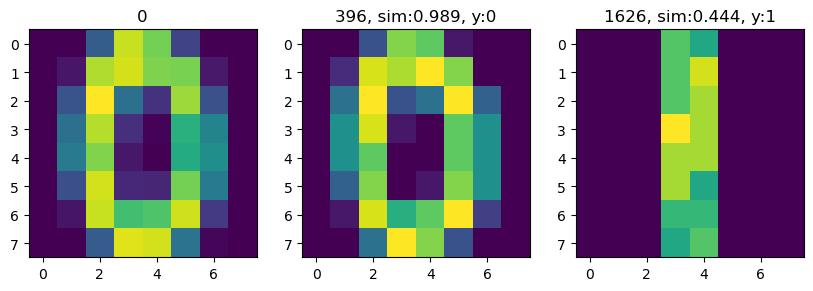

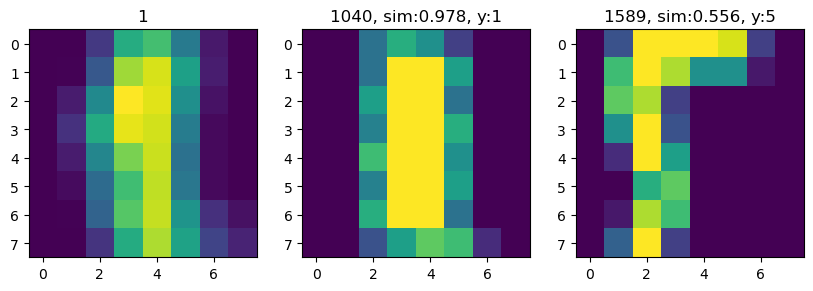

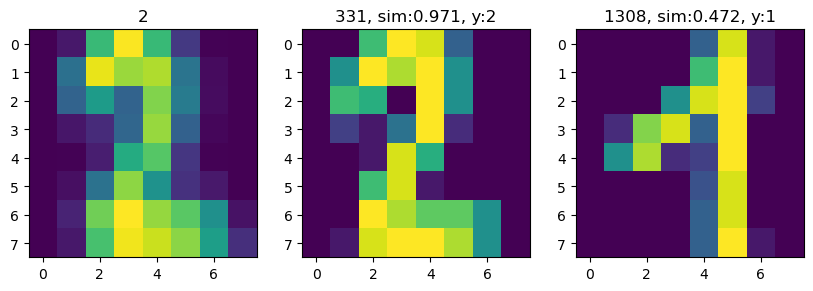

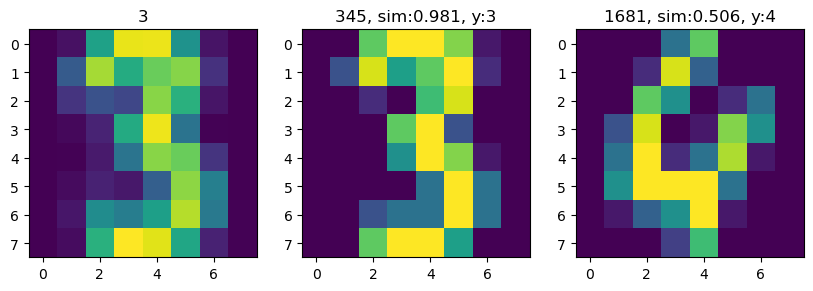

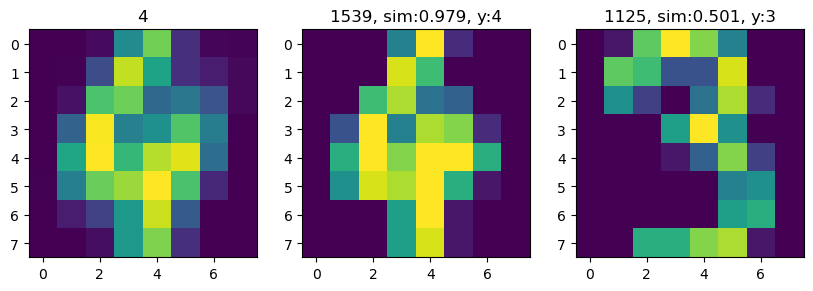

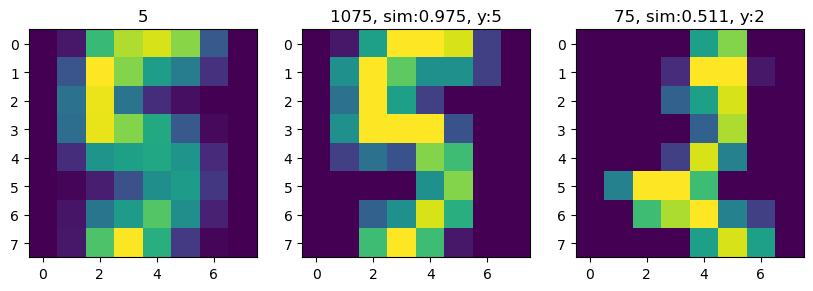

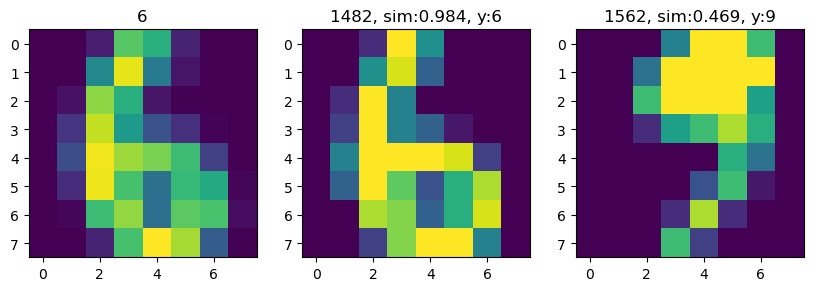

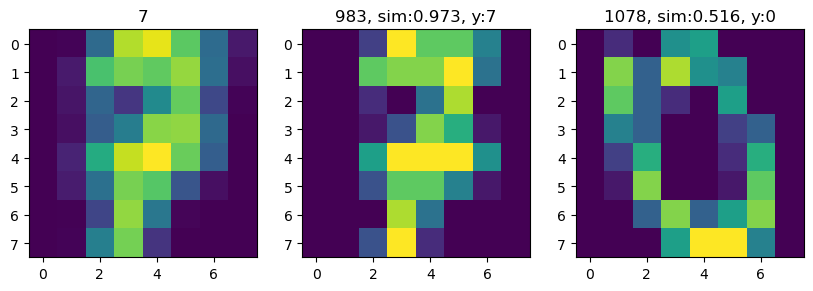

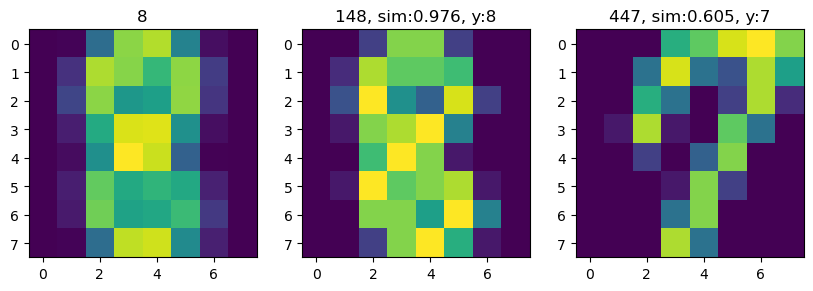

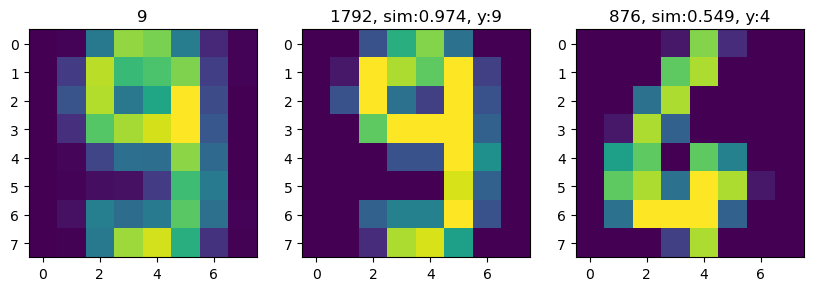

In [22]:
for i in range(0, 10):

    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    X = digits.data  # shape (1797, 64)
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_images[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{similarities[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()

__Be prepared to explain__ what you see and reflect upon it!


# Exercise 3
Split your data set into 70% training data (features and labels), and 30% test data (this will be used for the classifiers below). Use the method ```train_test_split``` from ```klearn.model_selection```. Set the ```random_state=13  ``` and ```stratify``` on the labels (so that the test set has the same number of each label).


In [23]:
# *****************
# *** Your code ***
# *****************
from sklearn.model_selection import train_test_split
#X means data, Y means target
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.3,
    random_state=13, #random seed
    stratify=digits.target
)

print(X_train.shape, X_test.shape)  # (1257, 64) (540, 64)
print(y_train.shape, y_test.shape)  # (1257,) (540,)

(1257, 64) (540, 64)
(1257,) (540,)


# Exercise 4: k-NN
Process the data with a k-NN classifier as follows: 

### Exercise 4.1
Set up a ```sklearn.neighbors.KNeighborsClassifier``` as it comes in SciKitLearn with ```n_neighbors = 5, algorithm = 'brute'``` and otherwise default parameters


In [24]:
# *****************
# *** Your code ***
# *****************
from sklearn.neighbors import KNeighborsClassifier
#take the neareast 5 neighbors each time
#algorithm='brute': brute-force search over all training samples
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

### Exercise 4.1
Prepare the classifier ("fit a model") with your training data, i.e. do something like


In [25]:
# *****************
# *** Your code ***
# *****************
# fit stores the training data so nearest-neighbor queries can run later
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Exercise 4.2
 Apply your classifier to the test data, i.e., get predictions for the test data with


In [26]:
# *****************
# *** Your code ***
# *****************
# predict labels for the held-out test set
y_pred = knn.predict(X_test)

Get the nearest neighbors and the corresponding distances in the training set for each test sample by using


In [27]:
#Usage <distances, neighbors> = <classifier>.kneighbors( <test_features>) 

# *** Your code ***
distances, neighbors = knn.kneighbors(X_test)
print(f"Nearest-neighbor indices for the first test sample: {neighbors[0]}, distances: {distances[0]}")

Nearest-neighbor indices for the first test sample: [874 812 218 519 554], distances: [26.45751311 27.16615541 28.14249456 28.14249456 28.23118843]


Visualize the 5 nearest neighbors for a few test images (see tutorial)!


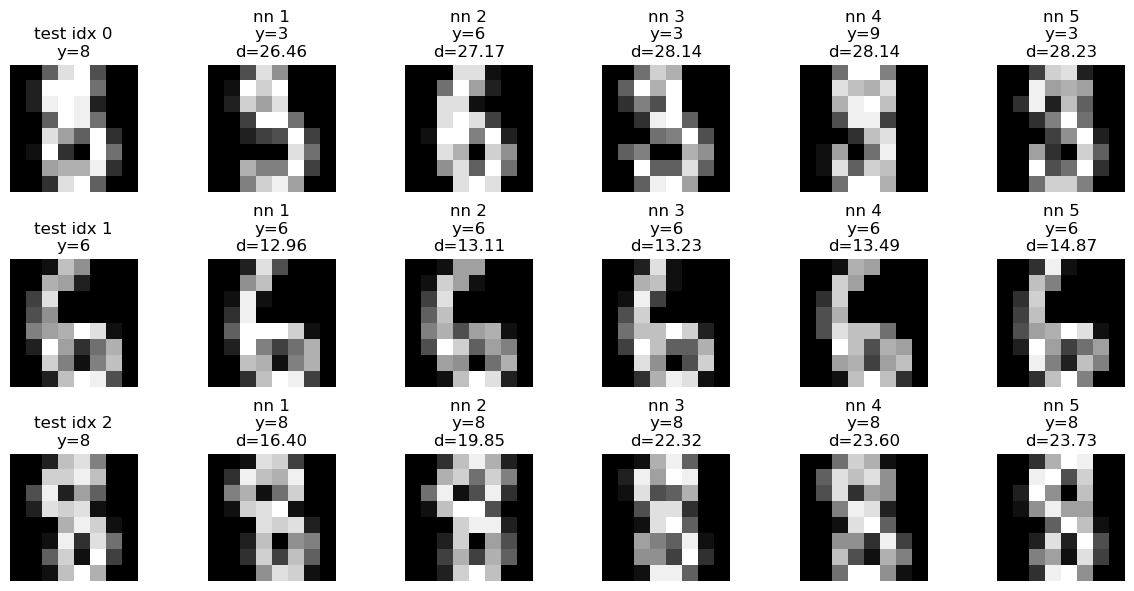

In [28]:
# *****************
# *** Your code ***
# *****************
# visualize the 5 nearest neighbors for a few test samples
num_examples = 3  # change to display more/less
fig, axes = plt.subplots(num_examples, 6, figsize=(12, 6))

for row in range(num_examples):
    test_idx = row  # take the first few test samples; pick any index you like
    # column 0: the test image itself
    axes[row, 0].imshow(X_test[test_idx].reshape(8, 8), cmap='gray')
    axes[row, 0].set_title(f"test idx {test_idx}\ny={y_test[test_idx]}")
    axes[row, 0].axis('off')

    # columns 1-5: its five nearest neighbors from the training set
    for col, (neighbor_idx, dist) in enumerate(zip(neighbors[test_idx], distances[test_idx]), start=1):
        axes[row, col].imshow(X_train[neighbor_idx].reshape(8, 8), cmap='gray')
        axes[row, col].set_title(f"nn {col}\ny={y_train[neighbor_idx]}\nd={dist:.2f}")
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()
        

### Exercise 4.3
Evaluate your classifier with the sklearn.metrics tools classification_report and confusion_matrix:


In [29]:
# Usage metrics.classification_report( <test_labels>, <predicted_labels>) 
# *****************
# *** Your code ***
# *****************
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report:")
print(classification_report(y_test, y_pred))
#precision：how many of the predicted positive instances were actually positive
#recall: how many of the actual positive instances were correctly predicted
#F1-score: harmonic mean of precision and recall
#accuracy: overall, how many instances were correctly predicted
#macro avg: unweighted mean across all classes
#weighted avg: mean across all classes, weighted by number of instances 
# in each class


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       0.98      0.98      0.98        53
           3       0.98      0.96      0.97        55
           4       1.00      0.98      0.99        54
           5       0.98      1.00      0.99        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.96      0.94      0.95        52
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



and


In [30]:
# USage metrics.confusion_matrix( <test_labels, <predicted_labels>)
# *****************
# *** Your code ***
# *****************
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
#rows: true labels
#columns: predicted labels
#number at (i, j): number of instances with true label i predicted as label j

Confusion matrix:
 [[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  1 53  0  1  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  1  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  1  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  1 53]]


# Exercise 5: k-Means
Cluster the data with k-Means as follows:


### Exercise 5.1
Set up a k-Means instance (```sklearn.cluster.KMeans```) with ```n_clusters=10```, ```n_init=100``` and ```random_state=42```.


In [31]:
#*** Your code ***
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=100, random_state=42)  # 10 clusters, run 100 initializations

### Exercise 5.2
Apply the clustering approach with


In [32]:
#<clusters> = <clustering>.fit(<train_features>)
# *** Your code ***
clusters = kmeans.fit(X_train)

### Exercise 5.3
Visualise the found cluster centers (you can get them using <clustering>.cluster_centers_); those are in principle also images, but maybe not as clearly interpretable as you would have hoped for. Compare what you see with the scatter plot you got from UMAP, i.e. find k-Means-clusters (visualised as cluster center images) and corresponding UMAP-plot-clusters (visualised as blobs or scattered dots in the plot) that are clearly distinct from everything else or others that seem to be "all the same" or at least very close.


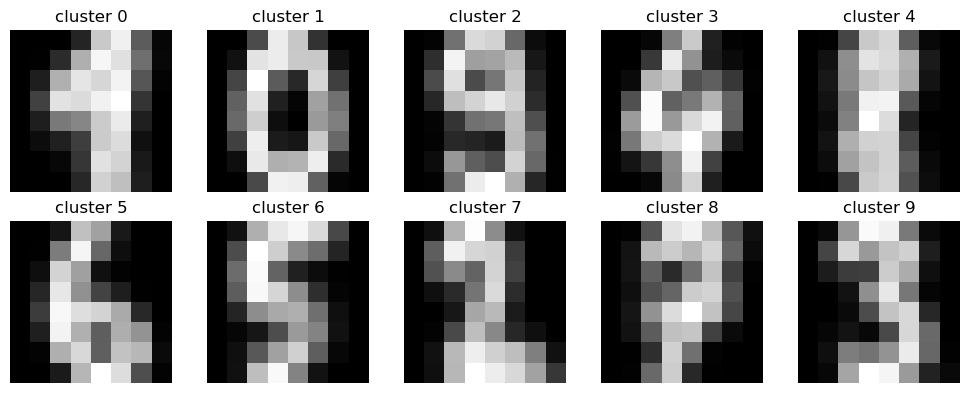

C:\Users\12627\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


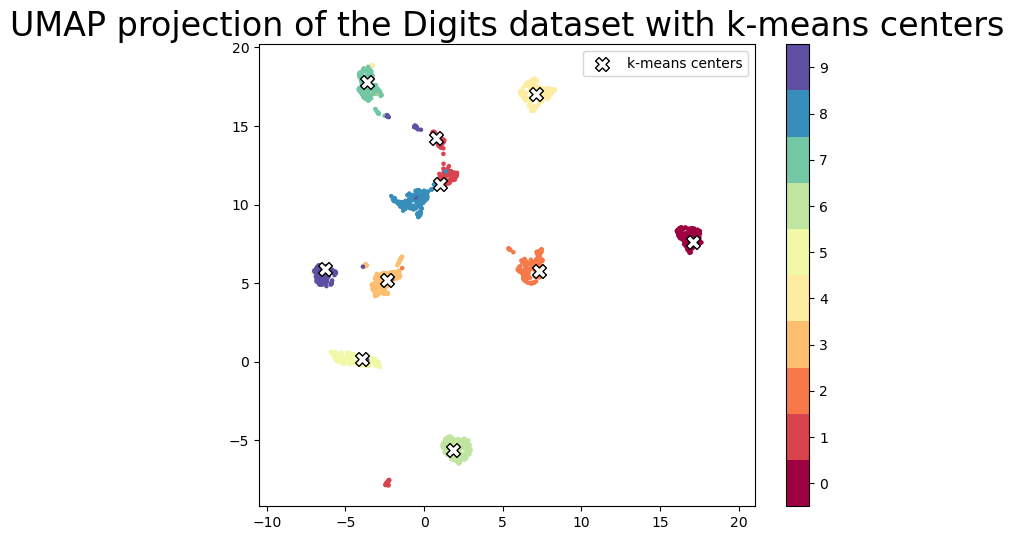

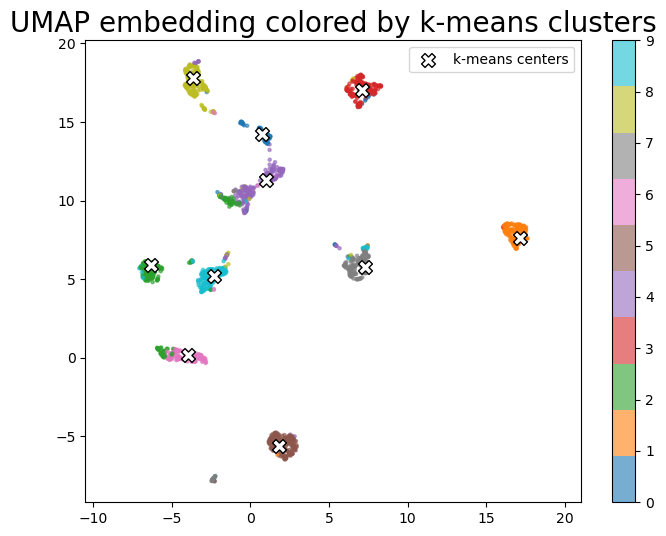

In [ ]:
# *****************
# *** Your code ***
# *****************
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, center, idx in zip(axes.ravel(), centers, range(10)):
    ax.imshow(center, cmap='gray')
    ax.set_title(f"cluster {idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# plot UMAP embedding with k-means cluster centers
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

cluster_embedding = reducer.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
points = plt.scatter(embedding[:, 0], embedding[:, 1],
                     c=digits.target, cmap='Spectral', s=5)
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1],
            marker='X', s=100, linewidth=1.0,
            facecolors='white', edgecolors='black', label='k-means centers')

plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(points, boundaries=np.arange(11) - 0.5)
cbar.set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset with k-means centers', fontsize=24)
plt.legend(loc='upper right')
plt.show()

cluster_labels = kmeans.predict(digits.data) 
cluster_embedding = reducer.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
centroid_scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                               c=cluster_labels, cmap='tab10', s=5, alpha=0.6)
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1],
            marker='X', s=100, linewidth=1.0,
            facecolors='white', edgecolors='black', label='k-means centers')

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(centroid_scatter, ticks=range(10))
plt.title('UMAP embedding colored by k-means clusters', fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Exercise 5.4
Investigate at least the following evaluation tools in the SciKitLearn documentation: ```metrics.completeness_score( <labels>, <cluster-labels>)``` and 
```metrics.homogeneity_score( <labels>, <cluster-labels>)```


For those to work you should run a prediction step over the training data (into cluster-labels). Rough numbers for what those measures should be can be found in the check list below.


In [34]:
# *****************
# *** Your code ***
# *****************
from sklearn.metrics import completeness_score, homogeneity_score

train_cluster_labels = kmeans.labels_  # cluster assignments for X_train
#how much of each gold class is captured inside a single cluster 
comp = completeness_score(y_train, train_cluster_labels)
#how “pure” each cluster is with respect to the gold labels
homo = homogeneity_score(y_train, train_cluster_labels)

print(f"Completeness score: {comp:.4f}")
print(f"Homogeneity score: {homo:.4f}")




Completeness score: 0.7576
Homogeneity score: 0.7491


For the interested: Try also the following score (the main concept is the mutual information score, the adjusted mutual information score is an improved variant) and give its documentation some thoughts, discuss it with your partner and in the peer review (it should make more sense after the information theory lecture, but there is also some intuition in it, that you can reflect upon)


In [ ]:
# Usage metrics.adjusted_mutual_info_score( <labels>, <cluster-labels>)
# *****************
# *** Your code ***
# *****************
from sklearn.metrics import adjusted_mutual_info_score
# Adjusted Mutual Information(AMI) between true labels and k-means clusters
# how much information the cluster assignments and the true labels share
ami = adjusted_mutual_info_score(y_train, kmeans.labels_)  
print(f"Adjusted mutual information: {ami:.4f}")

Adjusted mutual information: 0.7498


### Exercise 5.5
For each cluster, assign a label by taking the most common label of the training data assigned to the cluster.


In [36]:
# *****************
# *** Your code ***
# *****************
# Assign labels to clusters. 
import numpy as np

cluster_labels = kmeans.labels_  # cluster assignment for each training sample
cluster_to_digit = {}

for cluster_id in range(kmeans.n_clusters):
    members = y_train[cluster_labels == cluster_id] #bool array indicates whether the cluster has the correct lable
    if len(members) == 0:
        cluster_to_digit[cluster_id] = None  # empty cluster (should not happen here)
    else:
        majority_label = np.bincount(members).argmax()
        cluster_to_digit[cluster_id] = majority_label

print("Most common training digit per cluster:")
for cid, label in cluster_to_digit.items():
    print(f"cluster {cid} → digit {label}")


Most common training digit per cluster:
cluster 0 → digit 1
cluster 1 → digit 0
cluster 2 → digit 9
cluster 3 → digit 4
cluster 4 → digit 8
cluster 5 → digit 6
cluster 6 → digit 5
cluster 7 → digit 2
cluster 8 → digit 7
cluster 9 → digit 3


### Exercise 5.6
Use the clustering result from the previous exercise to do a prediction for the test data and evaluate the result. It should be quite bad.


In [37]:
# *****************
# *** Your code ***
# *****************
# Predict on the test set

test_clusters = kmeans.predict(X_test)
cluster_preds = np.array([cluster_to_digit[c] for c in test_clusters])

print("Classification report:")
print(classification_report(y_test, cluster_preds))

cm_cluster = confusion_matrix(y_test, cluster_preds)
print("Confusion matrix:\n", cm_cluster)

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.73      0.35      0.47        55
           2       0.83      0.81      0.82        53
           3       0.87      0.82      0.84        55
           4       0.98      0.87      0.92        54
           5       0.86      0.76      0.81        55
           6       1.00      0.98      0.99        54
           7       0.83      0.96      0.89        54
           8       0.43      0.50      0.46        52
           9       0.57      0.87      0.69        54

    accuracy                           0.79       540
   macro avg       0.81      0.79      0.79       540
weighted avg       0.81      0.79      0.79       540

Confusion matrix:
 [[53  0  0  0  1  0  0  0  0  0]
 [ 0 19  7  0  0  1  0  0 28  0]
 [ 1  0 43  3  0  0  0  3  3  0]
 [ 0  0  1 45  0  2  0  2  0  5]
 [ 0  4  0  0 47  0  0  1  2  0]
 [ 0  0  0  1  0 42  0  0  0 12]
 